## Twitter data wrangling and analysis

The goal is to wrangle WeRateDogs Twitter data, and analyze it to create interesting analyses and visualizations.

### Load libraries

In [276]:

import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import os
import json
from datetime import datetime

% matplotlib inline

### Gather data

We need three pieces of data

#### The WeRateDogs Twitter archive

This file given by Udacity was downloaded manually

In [4]:
# Load the twitter achive into the workspace
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sample()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
569  801958328846974976                    NaN                  NaN   

                     timestamp  \
569  2016-11-25 01:18:59 +0000   

                                                source  \
569  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
569  This is Ronnie. He hopes you're having a great...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
569                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
569  https://twitter.com/dog_rates/status/801958328...                12   

     rating_denominator    name doggo floofer pupper puppo  
569                  10  Ronnie  None    None   None  None

#### The tweet image predictions

 This file hosted on Udacity's servers should be downloaded programmatically. It contains dog breed predictions from a neural network classifier.
 

In [7]:
# Programmatically download the image predictions file

download_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(download_url)
with open(os.path.join(os.getcwd(),'image-predictions.tsv'), mode="wb") as file:
    file.write(response.content)

In [8]:
# Load the image predictions into a dataframe
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
image_pred.sample()

tweet_id                                          jpg_url  \
1591  798665375516884993  https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg   

      img_num    p1   p1_conf  p1_dog       p2  p2_conf  p2_dog          p3  \
1591        1  chow  0.243529    True  hamster  0.22715   False  Pomeranian   

       p3_conf  p3_dog  
1591  0.056057    True

####  Additional data from Twitter API 

Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy access library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with  tweet ID and the additional data. 

In [11]:
# After setting up a Twitter application, this code will create an API object that can be used to gather Twitter data.
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api_object = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True )

In [24]:
# Let's view the tweet information for one tweet ID to know what additional data can be collected from the API
tweet_ids = list(twitter_archive ['tweet_id'])
sample_tweet_id= tweet_ids[3]
tweet = api_object.get_status(sample_tweet_id,tweet_mode='extended')
tweet_info=tweet._json
tweet_info


{'created_at': 'Sun Jul 30 15:58:51 +0000 2017',
 'id': 891689557279858688,
 'id_str': '891689557279858688',
 'full_text': 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'truncated': False,
 'display_text_range': [0, 79],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 891689552724799489,
    'id_str': '891689552724799489',
    'indices': [80, 103],
    'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg',
    'url': 'https://t.co/tD36da7qLQ',
    'display_url': 'pic.twitter.com/tD36da7qLQ',
    'expanded_url': 'https://twitter.com/dog_rates/status/891689557279858688/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 510, 'h': 680, 'resize': 'fit'},
     'medium': {'w': 901, 'h': 1200, 'resize': 'fit'},
     'large': {'w': 1201,

We have two parameters of our interest listed here:  
* retweet_count 
* favorite_count. 



In [27]:
# For all the tweet_ids, we will extract json data from the api object 
# The tweets corresponding to a few tweet IDs in the archive may have been deleted.
all_tweet_data=[]
deleted_tweetid={}
counter=1
for tweet_id in tweet_ids:
    try:
        print(counter)
        tweet = api_object.get_status( tweet_id,tweet_mode='extended')
        tweet_info=tweet._json
        all_tweet_data.append(tweet_info)
        counter=counter+1
    except Exception as err:
        deleted_tweetid[tweet_id]=err
        print(str(tweet_id),':',str(err))
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
873697596434513921 : [{'code': 144, 'message': 'No status found with that ID.'}]
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
869988702071779329 : [{'code': 144, 'message': 'No status found with that ID.'}]
117
118
119
120
121
122
123
124
125
126
127
128
129
130
866816280283807744 : [{'code': 144, 'message': 'No status found with that ID.'}]
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
861769973181624320 : [{'code': 144, 'message': 'No status found with that ID.'}]
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
1

Rate limit reached. Sleeping for: 799


870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
754011816964026368 : [{'code': 144, 'message': 'No status found with that ID.'}]
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078


Rate limit reached. Sleeping for: 821


1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967


In [28]:
# Let's find out the number of exceptions
print(len(deleted_tweetid.keys()))

13


In [64]:
# Let us write the content from all_tweet_data to a file called tweet_json.txt

with open(os.path.join(os.getcwd(),'tweet_json.txt'), mode="w") as file:
    for tweet_info in all_tweet_data:
        file.write(json.dumps(tweet_info)+'\n')


In [74]:
# Read data of interest from from the textfile into a dataframe
df_dictlist=[]
with open('tweet_json.txt', mode='r') as f:
    for line in f.readlines():
        tweet = json.loads(line)
        df_dictlist.append({'tweet_id': tweet['id'],
                            'retweet_count': tweet['retweet_count'], 
                            'favorite_count': tweet['favorite_count']})

In [75]:
# Build a dataframe from the additional data 

data_from_api= pd.DataFrame(df_dictlist, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [76]:
# View the dataframe
data_from_api.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8542           38620
1  892177421306343426           6282           33105
2  891815181378084864           4161           24922
3  891689557279858688           8660           42021
4  891327558926688256           9421           40171

### Assess data

After gathering the three pieces of data, we are now going to assess them visually and programmatically for quality and tidiness issues. 

Comments are made below the inspections and finally consolidated and documented as quality and tidiness issues at the end of the assessment section

#### twitter_archive table

In [84]:
# Visual assessment
twitter_archive.head(2)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

In [77]:
# Inspect the twitter_archive table
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The csv file was opened and examined visually by scrolling through

In [82]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [95]:
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
388   826598365270007810                    NaN                  NaN   
1693  681297372102656000                    NaN                  NaN   
1762  678643457146150913                    NaN                  NaN   
604   798585098161549313                    NaN                  NaN   
997   748324050481647620                    NaN                  NaN   

                      timestamp  \
388   2017-02-01 01:09:42 +0000   
1693  2015-12-28 02:15:26 +0000   
1762  2015-12-20 18:29:43 +0000   
604   2016-11-15 17:54:59 +0000   
997   2016-06-30 01:15:31 +0000   

                                                 source  \
388   <a href="http://twitter.com/download/iphone" r...   
1693  <a href="http://twitter.com/download/iphone" r...   
1762  <a href="http://twitter.com/download/iphone" r...   
604   <a href="http://twitter.com/download/iphone" r...   
997   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
388   This is Pawnd... James Pawnd. He's suave af. 1...                  NaN   
1693  This is actually a lion. We only rate dogs. Fo...                  NaN   
1762  Meet Grizz. He just arrived. Couldn't wait unt...                  NaN   
604   RT @dog_rates: This is Timison. He just told a...         6.671828e+17   
997   This is Duke. He permanently looks like he jus...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
388                        NaN                        NaN   
1693                       NaN                        NaN   
1762                       NaN                        NaN   
604               4.196984e+09  2015-11-19 03:29:07 +0000   
997                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
388   https://twitter.com/dog_rates/status/826598365...                13   
1693  https://twitter.com/dog_rates/status/681297372...                12   
1762  https://twitter.com/dog_rates/status/678643457...                10   
604   https://twitter.com/dog_rates/status/667182792...                10   
997   https://twitter.com/dog_rates/status/748324050...                11   

      rating_denominator      name doggo floofer pupper puppo  
388                   10     Pawnd  None    None   None  None  
1693                  10  actually  None    None   None  None  
1762                  10     Grizz  None    None   None  None  
604                   10   Timison  None    None   None  None  
997                   10      Duke  None    None   None  None

In [83]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [89]:
#Number of name entries that are None
sum(twitter_archive.name=='None')

745

In [93]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
an            7
Bailey        7
Daisy         7
Toby          7
Leo           6
Rusty         6
Stanley       6
Bella         6
Scout         6
Koda          6
Jax           6
Oscar         6
Jack          6
Milo          6
Dave          6
Alfie         5
           ... 
Mac           1
Jimbo         1
Winifred      1
Ginger        1
Kendall       1
Augie         1
Nimbus        1
Rueben        1
Clarq         1
Ben           1
Benny         1
Tove          1
Kayla         1
Rodney        1
Leonidas      1
Callie        1
Loomis        1
Dex           1
Beebop        1
Apollo        1
Aiden         1
Eazy          1
Akumi         1
Stu           1
all           1
Opie          1
Lucia         1
Pavlov        1
Josep         1
Maxwell       1
Name: name, Length: 957,

* It has 2356 rows/observations and 17 columns

#### Some observations

* tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are in int/float datatypes and need to be fixed. 

* retweeted_status_timestamp is of object datatype, which should be changed to datetime type to be suited for analysis

* doggo, floofer, pupper and puppo are dog stages which can be structured better as values for a single variable

* Nulls for the dog stages are represented as None 

*  As per specifications, we should retain only original tweets. So retweets and replies need to be removed. 

* Expanded_urls has some missing entries

* names have 'None' and some names are not identified correctly (a, an .. )

* Rating denominator column has values other than 10. 



According to specifications, the fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs. 
[https://knowyourmeme.com/memes/theyre-good-dogs-brent]


In [78]:
# Check for duplicates
sum(twitter_archive.duplicated())

0

#### image_predictions table

In [85]:
image_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [86]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [92]:
# A crude way of checking that the urls are valid. 
#This is not foolproof but gives an idea
sum(image_pred.jpg_url.str.contains('http'))

2075

In [96]:
image_pred.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [97]:
image_pred.sample(5)

tweet_id                                          jpg_url  \
518   676470639084101634  https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg   
1985  872261713294495745  https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg   
941   704054845121142784  https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg   
1348  759557299618865152  https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg   
233   670420569653809152  https://pbs.twimg.com/media/CU3P82RWEAAIVrE.jpg   

      img_num                  p1   p1_conf  p1_dog                        p2  \
518         1    golden_retriever  0.790386    True                    borzoi   
1985        2  Labrador_retriever  0.972019    True     flat-coated_retriever   
941         1      Great_Pyrenees  0.667939    True                    kuvasz   
1348        2    golden_retriever  0.763333    True  Chesapeake_Bay_retriever   
233         1             bow_tie  0.268759   False                  cardigan   

       p2_conf  p2_dog                        p3   p3_conf  p3_dog  
518   0.022885    True                     dingo  0.015343   False  
1985  0.008178    True  Chesapeake_Bay_retriever  0.007359    True  
941   0.228764    True          golden_retriever  0.043885    True  
1348  0.194251    True        Labrador_retriever  0.012225    True  
233   0.153957   False                       wig  0.072295   False

#### Data from API

In [90]:
data_from_api.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8542           38620
1  892177421306343426           6282           33105
2  891815181378084864           4161           24922
3  891689557279858688           8660           42021
4  891327558926688256           9421           40171

In [91]:
data_from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
tweet_id          2343 non-null int64
retweet_count     2343 non-null int64
favorite_count    2343 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [98]:
data_from_api.describe()

tweet_id  retweet_count  favorite_count
count  2.343000e+03    2343.000000     2343.000000
mean   7.422769e+17    2988.886470     8044.662399
std    6.836264e+16    4932.716218    12154.889574
min    6.660209e+17       0.000000        0.000000
25%    6.783607e+17     602.500000     1401.500000
50%    7.186315e+17    1399.000000     3524.000000
75%    7.986999e+17    3494.500000     9927.000000
max    8.924206e+17   76932.000000   142702.000000

In [99]:
data_from_api.sample(5)

tweet_id  retweet_count  favorite_count
65    879415818425184262          44256          105540
767   776088319444877312            169            1985
383   826115272272650244           3473           16851
1445  695074328191332352           1203            3032
672   788552643979468800           8106               0

#### Observations

* Image predictions table has lesser number of entries, so not all records have predictions associated 

* Datatype of p1, p2, p3 is better represented as category than object

* Data type of twitter_id in the predictions table and the  api data table needs to be changed

* This table can be merged with the twitter_archive data using the twitter_id as joining column. It's not necessary to retain it as a separate table 

### Assessment summary

#### Data Tidiness Issues

* The dog stages (doggo, pupper, floofer and puppo) in the twitter_archive table are supposed to be a single column with possible values

* The additional data gathered from the API  and image predictions can be merged with the twitter_archive table as they contain information about the same tweets. 

#### Data Quality Issues

* Erroneous datatypes are present in the twitter archive table: tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id as they appear like numerical columns

* Nulls in the dog stages column need to be handled as they are represented as None

* Datatype for the timestamp in twitter_archive is erroneous. Once the datetime datatype is fixed it needs to  be checked that there are no tweets after August 2017 
  
* Fix datatype for tweet_id in image_pred table and data_from_api table

* Datatype of p1, p2, p3 is better represented as category than object in image predictions

* We want only original ratings. Retweet records are present in the dataset.

* Replies also do not qualify as original tweets. 

* Unwanted columns relating to retweets and replies are present

* Some records from the twitter_archive table do not have image_urls and hence no predictions. 


### Cleaning data

In [252]:
# Make copies of all tables before cleaning

twitter_clean = twitter_archive.copy()
image_pred_clean=image_pred.copy()
api_data_clean = data_from_api.copy()

### Data Tidiness Issues


#### Define

__Change the dog stages (doggo, pupper, floofer and puppo) in the twitter_archive table into a single column with possible values and handle the null values__

* Extract the dog stage from the tweet text using Regular expressions 
* Check that it matches with the existing stage specified
* It will have NaN for cases where the stage is not specified in the tweet text
* Remove the four separate columns 

#### Code


In [253]:
twitter_clean['dog_stage'] = twitter_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')


twitter_clean.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo dog_stage  
0                  10  Phineas  None    None   None  None       NaN  
1                  10    Tilly  None    None   None  None       NaN  
2                  10   Archie  None    None   None  None       NaN

In [235]:
twitter_clean[['dog_stage','doggo','floofer','puppo','pupper']].sample(25)

dog_stage doggo floofer  puppo  pupper
1565       NaN  None    None   None    None
1279    pupper  None    None   None  pupper
1603    pupper  None    None   None  pupper
1086       NaN  None    None   None    None
1954    pupper  None    None   None  pupper
333        NaN  None    None   None    None
1643    pupper  None    None   None    None
1017       NaN  None    None   None    None
1398       NaN  None    None   None    None
1861       NaN  None    None   None    None
1841       NaN  None    None   None    None
1677       NaN  None    None   None    None
2040       NaN  None    None   None    None
1697    pupper  None    None   None  pupper
537        NaN  None    None   None    None
1790       NaN  None    None   None    None
413      puppo  None    None  puppo    None
800        NaN  None    None   None    None
2174       NaN  None    None   None    None
598        NaN  None    None   None    None
2235       NaN  None    None   None    None
1025       NaN  None    None   None    None
979        NaN  None    None   None    None
597        NaN  None    None   None    None
791        NaN  None    None   None    None

In [254]:
twitter_clean.drop(['doggo','floofer','puppo','pupper'], axis=1,inplace=True)

#### Test

In [255]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


All 'None' have been changed to NaN where extraction has not been possible from text


#### Define

__The additional data gathered from the API and image predictions can be merged with the twitter_archive table as they contain information about the same tweets__

#### Code

In [256]:
twitter_clean=pd.merge(left = twitter_clean, right = api_data_clean, how='left', on='tweet_id')
twitter_clean = pd.merge(twitter_clean, image_pred_clean, how='left', on='tweet_id')

#### Test

In [257]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
retweet_count                 2343 non-null float64
favorite_count                2343 non-null float64
jpg_url                       2075 non-null object
img_num                       2

### Data Quality Issues

_Since the datasets have been merged these issues will be dealt with in the table twitter-clean_

#### Define

 __Erroneous datatypes for: tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id as they appear like numerical columns__


#### Code

In [258]:
# Fix erroneous datatypes that need to be changed to string

# Convert tweet_id to string in twitter_clean
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)

# Convert in_reply_to_status_id to string 
twitter_clean.in_reply_to_status_id = twitter_clean.in_reply_to_status_id.astype(str)

# Convert in_reply_to_user_id to string 
twitter_clean.in_reply_to_user_id = twitter_clean.in_reply_to_user_id.astype(str)

# Convert retweeted_status_id to string 
twitter_clean.retweeted_status_id = twitter_clean.retweeted_status_id.astype(str)

# Convert retweeted_status_user_id to string 
twitter_clean.retweeted_status_user_id = twitter_clean.retweeted_status_user_id.astype(str)

#### Test


In [259]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
retweet_count                 2343 non-null float64
favorite_count                2343 non-null float64
jpg_url                       2075 non-null object
img_num                     

#### Define

__Datatype for the timestamp in twitter_archive needs to be changed to datetime
It needs to  be checked that there are no tweets after August 2017__


#### Code

In [261]:
# Convert timestamp to datetime 
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)



#### Test

In [262]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
retweet_count                 2343 non-null float64
favorite_count                2343 non-null float64
jpg_url                       2075 non-null object
img_num             

In [263]:
# Check if there are tweets after Aug 2017

sum(twitter_clean.timestamp > pd.to_datetime('2017-08-31'))

0

#### Define

__Datatype of p1, p2, p3 is better represented as category than object in image predictions__

__ Datatype of p1_dog, p2_dog and p3_dog should be boolean__

#### Code

In [264]:
twitter_clean.p1 = twitter_clean.p1.astype('category')
twitter_clean.p2 = twitter_clean.p2.astype('category')
twitter_clean.p3 = twitter_clean.p3.astype('category')

twitter_clean.p1_dog = twitter_clean.p1_dog.astype('bool')
twitter_clean.p2_dog = twitter_clean.p2_dog.astype('bool')
twitter_clean.p3_dog = twitter_clean.p3_dog.astype('bool')

#### Test

In [265]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
retweet_count                 2343 non-null float64
favorite_count                2343 non-null float64
jpg_url                       2075 non-null object
img_num             

__Now all datatype issues have been dealt with and there are no tweets after August 2017__

#### Define

__Nulls in the dog stages column need to be handled as they are represented as None - changed to NaN__
 
#### Resolved
* This has been taken care of while extracting dog stage from text and removing redundant columns under tidiness issues

#### Define

__Some records from the twitter_archive table do not have image_urls and hence no predictions__

Drop records where there is no jpg_url in the merged dataset

#### Code

In [267]:
twitter_clean = twitter_clean[~twitter_clean['jpg_url'].isnull()]

#### Test

In [268]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         2075 non-null object
in_reply_to_user_id           2075 non-null object
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           2075 non-null object
retweeted_status_user_id      2075 non-null object
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
dog_stage                     338 non-null object
retweet_count                 2068 non-null float64
favorite_count                2068 non-null float64
jpg_url                       2075 non-null object
img_num              

The rows with no image_urls have been dropped. So the number of records has reduced to 2075 from 2356

#### Define

__We want only original ratings. But retweets are present in the data.__

__Replies also do not qualify as original tweets.__
   
__Unwanted columns corresponding to retweets and replies are present__

#### Code

In [270]:
# Select only rows where the status is null for retweets and replies

twitter_clean= twitter_clean[twitter_clean.in_reply_to_status_id=='nan']
twitter_clean= twitter_clean[twitter_clean.retweeted_status_id=='nan']

# Remove unwanted columns
twitter_clean.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace= True )

#### Test

In [271]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             322 non-null object
retweet_count         1970 non-null float64
favorite_count        1970 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null category
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null category
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null category
p3_conf              

### Storing the clean dataset

In [272]:
twitter_clean.to_csv('twitter_archive_master.csv',index=False)

### Analysis and Visualization



__Rating Numerator Distribution__

In [273]:
twitter_clean.rating_numerator.describe()

count    1971.000000
mean       12.223237
std        41.634034
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [280]:
twitter_clean.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [284]:
sum(twitter_clean.rating_numerator > 15)

18

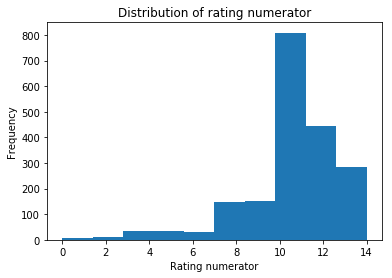

<Figure size 864x720 with 0 Axes>

In [298]:
# Ignoring values > 15 for the numerator(excluded 18 unlikely entries which were greater than 15)
nrlessthan15 = twitter_clean.rating_numerator[twitter_clean.rating_numerator < 15]
plt.hist(nrlessthan15);
plt.title('Distribution of rating numerator');
plt.xlabel('Rating numerator');
plt.ylabel('Frequency');
plt.figure(figsize=(12,10));


__The bulk of rating numerators fall in the range of 7 -14__

__Retweet Count Distribution__

In [458]:
twitter_clean.retweet_count.describe()

count     1970.000000
mean      2720.640102
std       4720.085490
min         13.000000
25%        607.250000
50%       1318.500000
75%       3117.250000
max      76932.000000
Name: retweet_count, dtype: float64

In [459]:
twitter_clean.retweet_count.value_counts()

328.0      5
252.0      5
305.0      4
509.0      4
304.0      4
391.0      4
1085.0     4
1903.0     4
1277.0     4
58.0       3
1037.0     3
735.0      3
813.0      3
585.0      3
1048.0     3
487.0      3
498.0      3
85.0       3
678.0      3
669.0      3
120.0      3
967.0      3
1220.0     3
224.0      3
625.0      3
3114.0     3
203.0      3
60.0       3
718.0      3
1491.0     3
          ..
3029.0     1
3638.0     1
2458.0     1
2575.0     1
6220.0     1
1029.0     1
4861.0     1
3785.0     1
2608.0     1
6147.0     1
996.0      1
2701.0     1
3211.0     1
3605.0     1
11086.0    1
5428.0     1
1448.0     1
8992.0     1
2014.0     1
2264.0     1
217.0      1
5930.0     1
2896.0     1
1144.0     1
479.0      1
962.0      1
135.0      1
1766.0     1
1420.0     1
4224.0     1
Name: retweet_count, Length: 1590, dtype: int64

In [460]:
sum(twitter_clean.retweet_count > 10000)

83

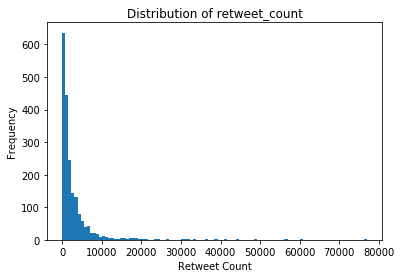

In [461]:


twitter_clean.retweet_count.plot(kind='hist', bins=100);
plt.title('Distribution of retweet_count');
plt.xlabel('Retweet Count');
plt.ylabel('Frequency');


__The bulk of retweet counts fall below 10000 with just 83 tweets being retweeted more than 10000 times. The distribution is skewed to the right.__

__Distribution of Favorite Count__

In [399]:
twitter_clean.favorite_count.describe()

count      1970.000000
mean       8876.574112
std       12646.034082
min          80.000000
25%        1933.000000
50%        4031.000000
75%       11153.750000
max      142702.000000
Name: favorite_count, dtype: float64

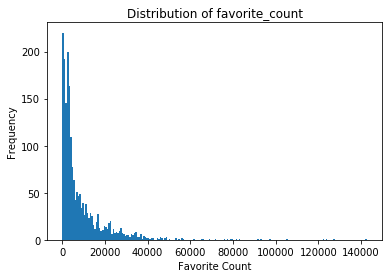

In [396]:
twitter_clean.favorite_count.plot(kind='hist', bins=200);
plt.title('Distribution of favorite_count');
plt.xlabel('Favorite Count');
plt.ylabel('Frequency');

In [397]:
sum(twitter_clean.favorite_count > 40000)

46

__The bulk of favorite counts lies under 40000 with only 46 tweets having a favorite count above 10000.  The distribution is skewed to the right.__



__Breeds that are most tweeted about based on top dog breed prediction (p1)__

Since p1 is the top prediction of dog breed from the neural network let's look closer at that column and try to connect the breed with other factors

In [300]:
twitter_clean.p1_dog.value_counts()

True     1463
False     508
Name: p1_dog, dtype: int64

There are 508 predictions which are not dog breeds. Let's ignore them and focus on predictions that are actually dog breeds and take the top 10 most common breeds


In [314]:
# Top 10 most commonly occurring dog breeds in p1 where p1_dog is TRUE
most_common = (twitter_clean.p1 [twitter_clean.p1_dog]).value_counts().sort_values(ascending= False)[:10]
most_common

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: p1, dtype: int64

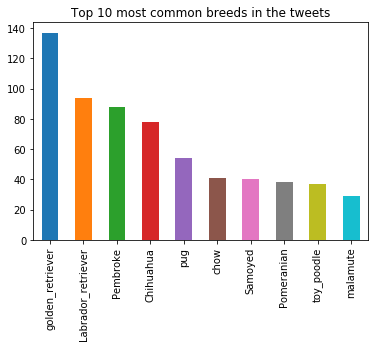

<Figure size 864x720 with 0 Axes>

In [464]:
most_common.plot(kind='bar');
plt.title('Top 10 most common breeds in the tweets');
plt.figure(figsize=(12,10));


__ Golden retriever and Labrador Retriever are the most common dog breeds that are tweeted about__



__ Most highly rated dog breeds__




In [353]:
# Filter the dataframe and get only the breed and numerator rating (<15)

breed_rating = twitter_clean[['p1','p1_dog','rating_numerator']]
breed_rating = breed_rating [breed_rating.p1_dog]
breed_rating = breed_rating [breed_rating.rating_numerator < 15]
rated_breeds = breed_rating.groupby(by= ['p1'])['rating_numerator'].median().sort_values(ascending = False)[:10]
rated_breeds

p1
Afghan_hound             13.0
Saluki                   13.0
Great_Pyrenees           12.0
briard                   12.0
Tibetan_mastiff          12.0
Samoyed                  12.0
flat-coated_retriever    12.0
golden_retriever         12.0
Rottweiler               12.0
Pembroke                 12.0
Name: rating_numerator, dtype: float64

 __Most highly retweeted dog breeds__

In [369]:
br = twitter_clean[['p1','p1_dog','retweet_count']]
br = br [br.p1_dog]
br = br [~br.retweet_count.isnull()]
retweet_breeds = br.groupby(by= ['p1'])['retweet_count'].median().sort_values(ascending = False)[:20]
retweet_breeds

p1
Irish_water_spaniel        5839.0
Afghan_hound               5121.0
giant_schnauzer            4947.5
Saluki                     4057.5
black-and-tan_coonhound    3993.5
Irish_setter               3229.5
Australian_terrier         2967.5
Leonberg                   2878.0
wire-haired_fox_terrier    2822.5
Tibetan_mastiff            2815.5
flat-coated_retriever      2792.0
Cardigan                   2720.0
French_bulldog             2608.0
Samoyed                    2587.0
basset                     2585.0
Norwegian_elkhound         2529.0
Bedlington_terrier         2459.0
Weimaraner                 2452.0
kelpie                     2366.0
Border_terrier             2266.0
Name: retweet_count, dtype: float64

__Breeds with high favorite counts__

In [368]:
bf = twitter_clean[['p1','p1_dog','favorite_count']]
bf = bf [bf.p1_dog]
bf = bf [~bf.favorite_count.isnull()]
favorite_breeds = bf.groupby(by= ['p1'])['favorite_count'].median().sort_values(ascending = False)[:20]
favorite_breeds

p1
Irish_water_spaniel        21266.0
Saluki                     20219.5
giant_schnauzer            16831.5
Afghan_hound               16831.0
black-and-tan_coonhound    16601.5
flat-coated_retriever      14700.5
Bedlington_terrier         13537.0
Border_terrier             13117.0
Norwegian_elkhound         12871.0
Leonberg                   11612.0
Australian_terrier         10854.5
French_bulldog             10824.0
Cardigan                   10332.0
Irish_setter                9948.0
Tibetan_mastiff             9684.0
kelpie                      9266.0
Weimaraner                  8863.5
basset                      8630.0
wire-haired_fox_terrier     8295.0
cocker_spaniel              8254.0
Name: favorite_count, dtype: float64

__Rating Numerator and Time__

We know that WeRateDogs follows a unique rating system ("They're good dogs!") where it's acceptable for the numerator to have values greater than 10. This piqued my interest to look closely at the ratings

Text(0.5,0,'Time (Year - Month)')

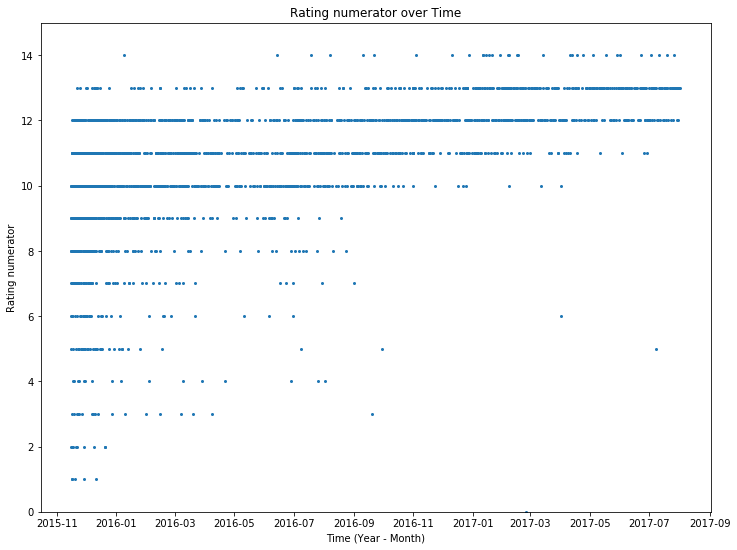

In [457]:
plt.figure(1, figsize = (12, 9));
plt.plot(twitter_clean.timestamp, twitter_clean.rating_numerator, marker='o', linestyle='', ms = 2);
plt.ylim(0,15);
plt.title('Rating numerator over Time')
plt.ylabel('Rating numerator');
plt.xlabel('Time (Year - Month)')

__After the incident that made ratings above 10 popular in September 2016, it has become a trend to rate dogs above 10. There are hardly any rating numerators below 10 after 2016 which is interesting. The rise in popularity of the incident and rating system is evident from the visualization__

__Number of tweets and time of the year__



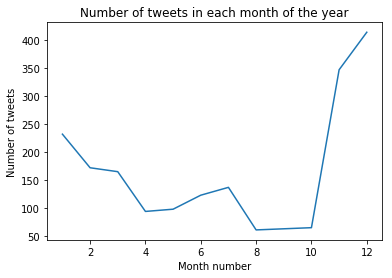

In [447]:
twitter_clean['year']=twitter_clean['timestamp'].dt.year
twitter_clean['month']=twitter_clean['timestamp'].dt.month

tweets_time= twitter_clean.groupby(['month'])['tweet_id'].count().plot()

plt.title('Number of tweets in each month of the year');
plt.xlabel('Month number');
plt.ylabel('Number of tweets');


__The holiday season - Thanksgiving, Christmas , New year seems to have the most number of tweets__

__Relationship between favorite count and retweet count__

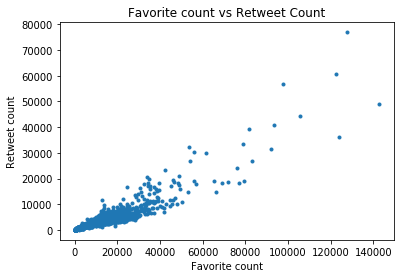

In [405]:
plt.plot(twitter_clean.favorite_count, twitter_clean.retweet_count, marker='o', linestyle='', ms=3 )

plt.title('Favorite count vs Retweet Count');
plt.xlabel('Favorite count');
plt.ylabel('Retweet count');

Favorite count and retweet count seem positively correlated from the scatterplot. Let's look at the correlation coefficient



In [413]:
counts=twitter_clean[['retweet_count','favorite_count']]
counts.corr()


retweet_count  favorite_count
retweet_count        1.000000        0.919902
favorite_count       0.919902        1.000000

__A correlation coefficient of 0.91 is pretty strong and supports the intuition that if people 'like' a tweet they tend to retweet it.__

### Resources

* https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
* https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
* https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/
* https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
* http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
